In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../Breast Cancer/Breast_Cancer_new_data.csv")

In [3]:
X = df.drop(['Diagnosis'],axis=1)

In [4]:
y=df['Diagnosis'].map({'B':0,'M':1})

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [10]:
from sklearn.metrics import plot_confusion_matrix,classification_report

RANDOM FOREST

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [13]:
rf.fit(scaled_X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [14]:
rf.feature_importances_

array([0.01765478, 0.15156949, 0.05353736, 0.26612156, 0.1074937 ,
       0.01765284, 0.17281633, 0.12411417, 0.01477999, 0.02863637,
       0.0456234 ])

In [15]:
importances_rf = pd.DataFrame(rf.feature_importances_)

In [16]:
importances_rf.info

<bound method DataFrame.info of            0
0   0.017655
1   0.151569
2   0.053537
3   0.266122
4   0.107494
5   0.017653
6   0.172816
7   0.124114
8   0.014780
9   0.028636
10  0.045623>

In [17]:
importances_rf

,0
0,0.017655
1,0.151569
2,0.053537
3,0.266122
4,0.107494
5,0.017653
6,0.172816
7,0.124114
8,0.014780
9,0.028636


In [18]:
X.columns

Index(['Id', 'Area Mean', 'Compactness Mean', 'Concave Points Mean',
       'Concavity Mean', 'Fractal Dimension Mean', 'Perimeter Mean',
       'Radius Mean', 'Smoothness Mean', 'Symmetry Mean', 'Texture Mean'],
      dtype='object')

In [19]:
features_importance_rf=pd.concat([pd.DataFrame(X.columns),importances_rf], axis=1)

In [20]:
features_importance_rf=features_importance_rf.set_axis(['features','importance_rf'],axis='columns')

In [21]:
features_importance_rf

,features,importance_rf
0,Id,0.017655
1,Area Mean,0.151569
2,Compactness Mean,0.053537
3,Concave Points Mean,0.266122
4,Concavity Mean,0.107494
5,Fractal Dimension Mean,0.017653
6,Perimeter Mean,0.172816
7,Radius Mean,0.124114
8,Smoothness Mean,0.014780
9,Symmetry Mean,0.028636


In [22]:
features_importance_rf=features_importance_rf.drop(features_importance_rf.index[0], axis=0)

In [23]:
features_importance_rf.sort_values(by='importance_rf',ascending=False)

,features,importance_rf
3,Concave Points Mean,0.266122
6,Perimeter Mean,0.172816
1,Area Mean,0.151569
7,Radius Mean,0.124114
4,Concavity Mean,0.107494
2,Compactness Mean,0.053537
10,Texture Mean,0.045623
9,Symmetry Mean,0.028636
5,Fractal Dimension Mean,0.017653
8,Smoothness Mean,0.014780


In [27]:
preds_rf = rf.predict(scaled_X_test)

In [28]:
print(classification_report(preds_rf, y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       110
           1       0.85      0.92      0.88        61

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.92      0.91      0.91       171



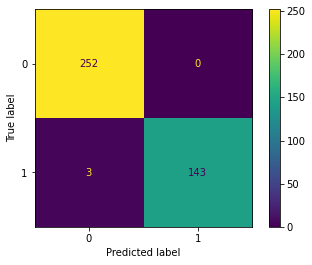

In [36]:
plot_confusion_matrix(rf,scaled_X_train,y_train)

GRADIENT BOOSTING

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gb= GradientBoostingClassifier()

In [39]:
gb.fit(scaled_X_train,y_train)

GradientBoostingClassifier()

In [40]:
importances_gb=gb.feature_importances_

In [41]:
importances_gb = pd.DataFrame(gb.feature_importances_)

In [42]:
features_importance_gb=pd.concat([pd.DataFrame(X.columns),importances_gb], axis=1)

In [43]:
features_importance_gb=features_importance_gb.set_axis(['features','importance_gb'],axis='columns')

In [44]:
features_importance_gb=features_importance_gb.drop(features_importance_gb.index[0], axis=0)

In [45]:
features_importance_gb.sort_values(by='importance_gb',ascending=False)

,features,importance_gb
3,Concave Points Mean,0.718944
10,Texture Mean,0.115199
1,Area Mean,0.053630
7,Radius Mean,0.036790
4,Concavity Mean,0.031258
6,Perimeter Mean,0.018255
8,Smoothness Mean,0.013710
5,Fractal Dimension Mean,0.004613
2,Compactness Mean,0.003129
9,Symmetry Mean,0.000550


In [46]:
preds_gb = gb.predict(scaled_X_test)

In [47]:
print(classification_report(preds_gb, y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       102
           1       0.92      0.88      0.90        69

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



C:\Users\setta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


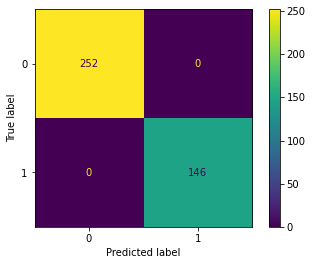

In [48]:
plot_confusion_matrix(gb,scaled_X_train,y_train)

Xg BOOST

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

C:\Users\setta\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [51]:
xgb.fit(scaled_X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
importances_xgb=xgb.feature_importances_

In [53]:
importances_xgb = pd.DataFrame(xgb.feature_importances_)

In [54]:
features_importance_xgb=pd.concat([pd.DataFrame(X.columns),importances_xgb], axis=1)

In [55]:
features_importance_xgb=features_importance_xgb.set_axis(['features','importance_xgb'],axis='columns')

In [56]:
features_importance_xgb=features_importance_xgb.drop(features_importance_xgb.index[0], axis=0)

In [57]:
features_importance_xgb.sort_values(by='importance_xgb',ascending=False)

,features,importance_xgb
3,Concave Points Mean,0.694216
10,Texture Mean,0.073444
1,Area Mean,0.072918
4,Concavity Mean,0.030043
8,Smoothness Mean,0.029630
6,Perimeter Mean,0.028430
2,Compactness Mean,0.019808
5,Fractal Dimension Mean,0.014254
9,Symmetry Mean,0.008580
7,Radius Mean,0.006530


In [58]:
preds_xgb = xgb.predict(scaled_X_test)

In [59]:
print(classification_report(preds_xgb, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.92      0.94      0.93        65

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



C:\Users\setta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


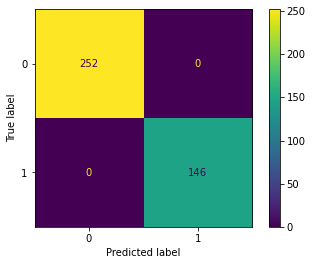

In [60]:
plot_confusion_matrix(xgb,scaled_X_train,y_train)

TOP 5 FEATURES IMPORTANCES OF (RF,GB,XGB)

In [61]:
features_importance_rf=features_importance_rf.head(5)

In [ ]:
features_importance_gb=features_importance_gb.head(5)

In [62]:
features_importance_xgb=features_importance_xgb.head(5)

In [63]:

features_importances = pd.merge(features_importance_rf, features_importance_gb, on='features', how='outer')
features_importances = pd.merge(features_importances, features_importance_xgb, on='features', how='outer')

In [65]:
features_importances=features_importances.dropna()

In [66]:
features_importances

,features,importance_rf,importance_gb,importance_xgb
0,Area Mean,0.151569,0.053630,0.072918
1,Compactness Mean,0.053537,0.003129,0.019808
2,Concave Points Mean,0.266122,0.718944,0.694216
3,Concavity Mean,0.107494,0.031258,0.030043
4,Fractal Dimension Mean,0.017653,0.004613,0.014254


In [68]:
features_importances=features_importances.set_index('features')

In [69]:
features_importances

,importance_rf,importance_gb,importance_xgb
features,,,
Area Mean,0.151569,0.053630,0.072918
Compactness Mean,0.053537,0.003129,0.019808
Concave Points Mean,0.266122,0.718944,0.694216
Concavity Mean,0.107494,0.031258,0.030043
Fractal Dimension Mean,0.017653,0.004613,0.014254


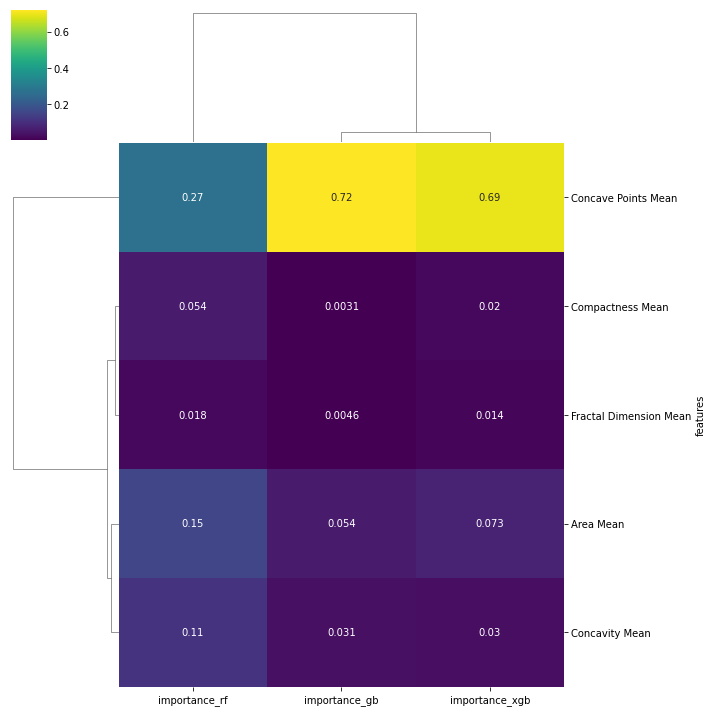

In [82]:
sns.clustermap(data=features_importances, cmap='viridis', annot=True)

In [83]:
features_importances.columns

Index(['importance_rf', 'importance_gb', 'importance_xgb'], dtype='object')

In [87]:
features_importances.index

Index(['Area Mean', 'Compactness Mean', 'Concave Points Mean',
       'Concavity Mean', 'Fractal Dimension Mean'],
      dtype='object', name='features')

In [93]:
trans

features,Area Mean,Compactness Mean,Concave Points Mean,Concavity Mean,Fractal Dimension Mean
importance_rf,0.151569,0.053537,0.266122,0.107494,0.017653
importance_gb,0.053630,0.003129,0.718944,0.031258,0.004613
importance_xgb,0.072918,0.019808,0.694216,0.030043,0.014254


<AxesSubplot:ylabel='features'>

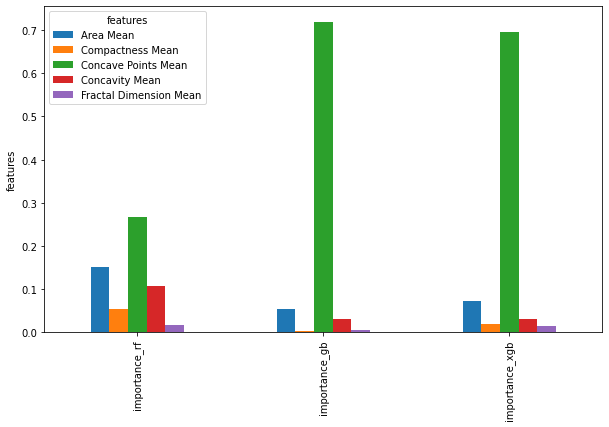

In [108]:
trans.plot(kind='bar', figsize=(10,6), ylabel='features')